# ✅**Functions.py**



In [ ]:
#   In collaboration with: 
#       Thodori Kapouranis
#       Steven Lee

#---------Defining Functions----------#
# -- CODING CONVENTIONS
# --- i represents row index
# --- j represents feature index

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns
from astropy.table import QTable, Table, Column
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split

# Sigmoid Function
def sig( thetas, sample ):
  h = 1 / ( 1 + np.exp( -1 * np.matmul(np.transpose(thetas), sample) ) )
  return h

# Probability function
def pFunc( thetas, sample, label ):
  lhs = ( sig( thetas, sample) ** label)
  rhs = ( ( 1 - sig( thetas, sample ) ) ** (1-label) )
  return (lhs*rhs)

# Likelihood function
def logLike( thetas, samples, labels ):
  summation = 0

  for i in range( len( samples ) ):
    a = labels[i] * np.log10( sig(thetas, samples[i]) )
    b = 1 - labels[i]
    c = np.log10( 1 - sig(thetas, samples[i]) )
    summation+= a + b*c

  return summation
  
# Derivative of likelihood function
def derLogLike( thetas, samples, labels, i, j ):
  d = ( labels[i] - sig(thetas, samples[i]) ) * samples[i][j]
  return d

# Stochastic Gradient Ascent Rule
def updateTheta( thetas, samples, labels, i, j, alpha=0.05):
  # NOT destructive 
  theta = thetas[j] + alpha*( derLogLike(thetas, samples, labels, i, j) )
  return  theta
  
def updateThetal1( thetas, samples, labels, i, j, l, alpha=0.05):
  penalty = l*np.sign(thetas[j])
  theta = thetas[j] + alpha*( derLogLike(thetas, samples, labels, i, j) - penalty)
  return  theta
  

def updateThetal2( thetas, samples, labels, i, j, l, alpha=0.05):
  # NOT destructive 
  penalty =  2*l*thetas[j]
  theta = thetas[j] + alpha*( derLogLike(thetas, samples, labels, i, j) - penalty)
  return  theta


# Return a array of predictions
def predict( thetas, samples ):
  pred=[]
  for i in samples:
    pred.append( sig(thetas, i) )
  return pred

# Returns the accuracy score, 0.0 to 1.0
def score( predictions, labels ):
  scoring=0;
  for i in range(len(predictions)):

    if ( predictions[i] >= 0.5):
      if ( labels[i] == 1):
        scoring+=1

    else:
      if ( labels[i] == 0):
        scoring+=1

  return scoring/len(predictions)
  
def addOneCol(x):
  return np.insert(x,0, np.ones((1,len(x))),axis=1)

''' Functions not used
def sumforPen(theta, x_train, y_train):
  length = len(y_train)
  left_pen=0
  for i in range(length):
    left = y_train[i]*np.matmul(np.transpose(theta), x_train[i]) 
    right = np.log10(1+np.exp(np.matmul(np.transpose(theta), x_train[i])))
    left_pen+=(left-right)
  return left_pen

def L2 (theta,x_train,y_train,X_val,y_val,i):
  good_lambda = 0
  max = 0
  left = sumforPen(theta,x_train,y_train)
  right = test_lambda[i] * np.square(theta[i])
  findmax = left - right
  return good_lambda
  '''

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


' Functions not used\ndef sumforPen(theta, x_train, y_train):\n  length = len(y_train)\n  left_pen=0\n  for i in range(length):\n    left = y_train[i]*np.matmul(np.transpose(theta), x_train[i]) \n    right = np.log10(1+np.exp(np.matmul(np.transpose(theta), x_train[i])))\n    left_pen+=(left-right)\n  return left_pen\n\ndef L2 (theta,x_train,y_train,X_val,y_val,i):\n  good_lambda = 0\n  max = 0\n  left = sumforPen(theta,x_train,y_train)\n  right = test_lambda[i] * np.square(theta[i])\n  findmax = left - right\n  return good_lambda\n  '

# ✅ **Scatterplot and baseline**

0.6595744680851063


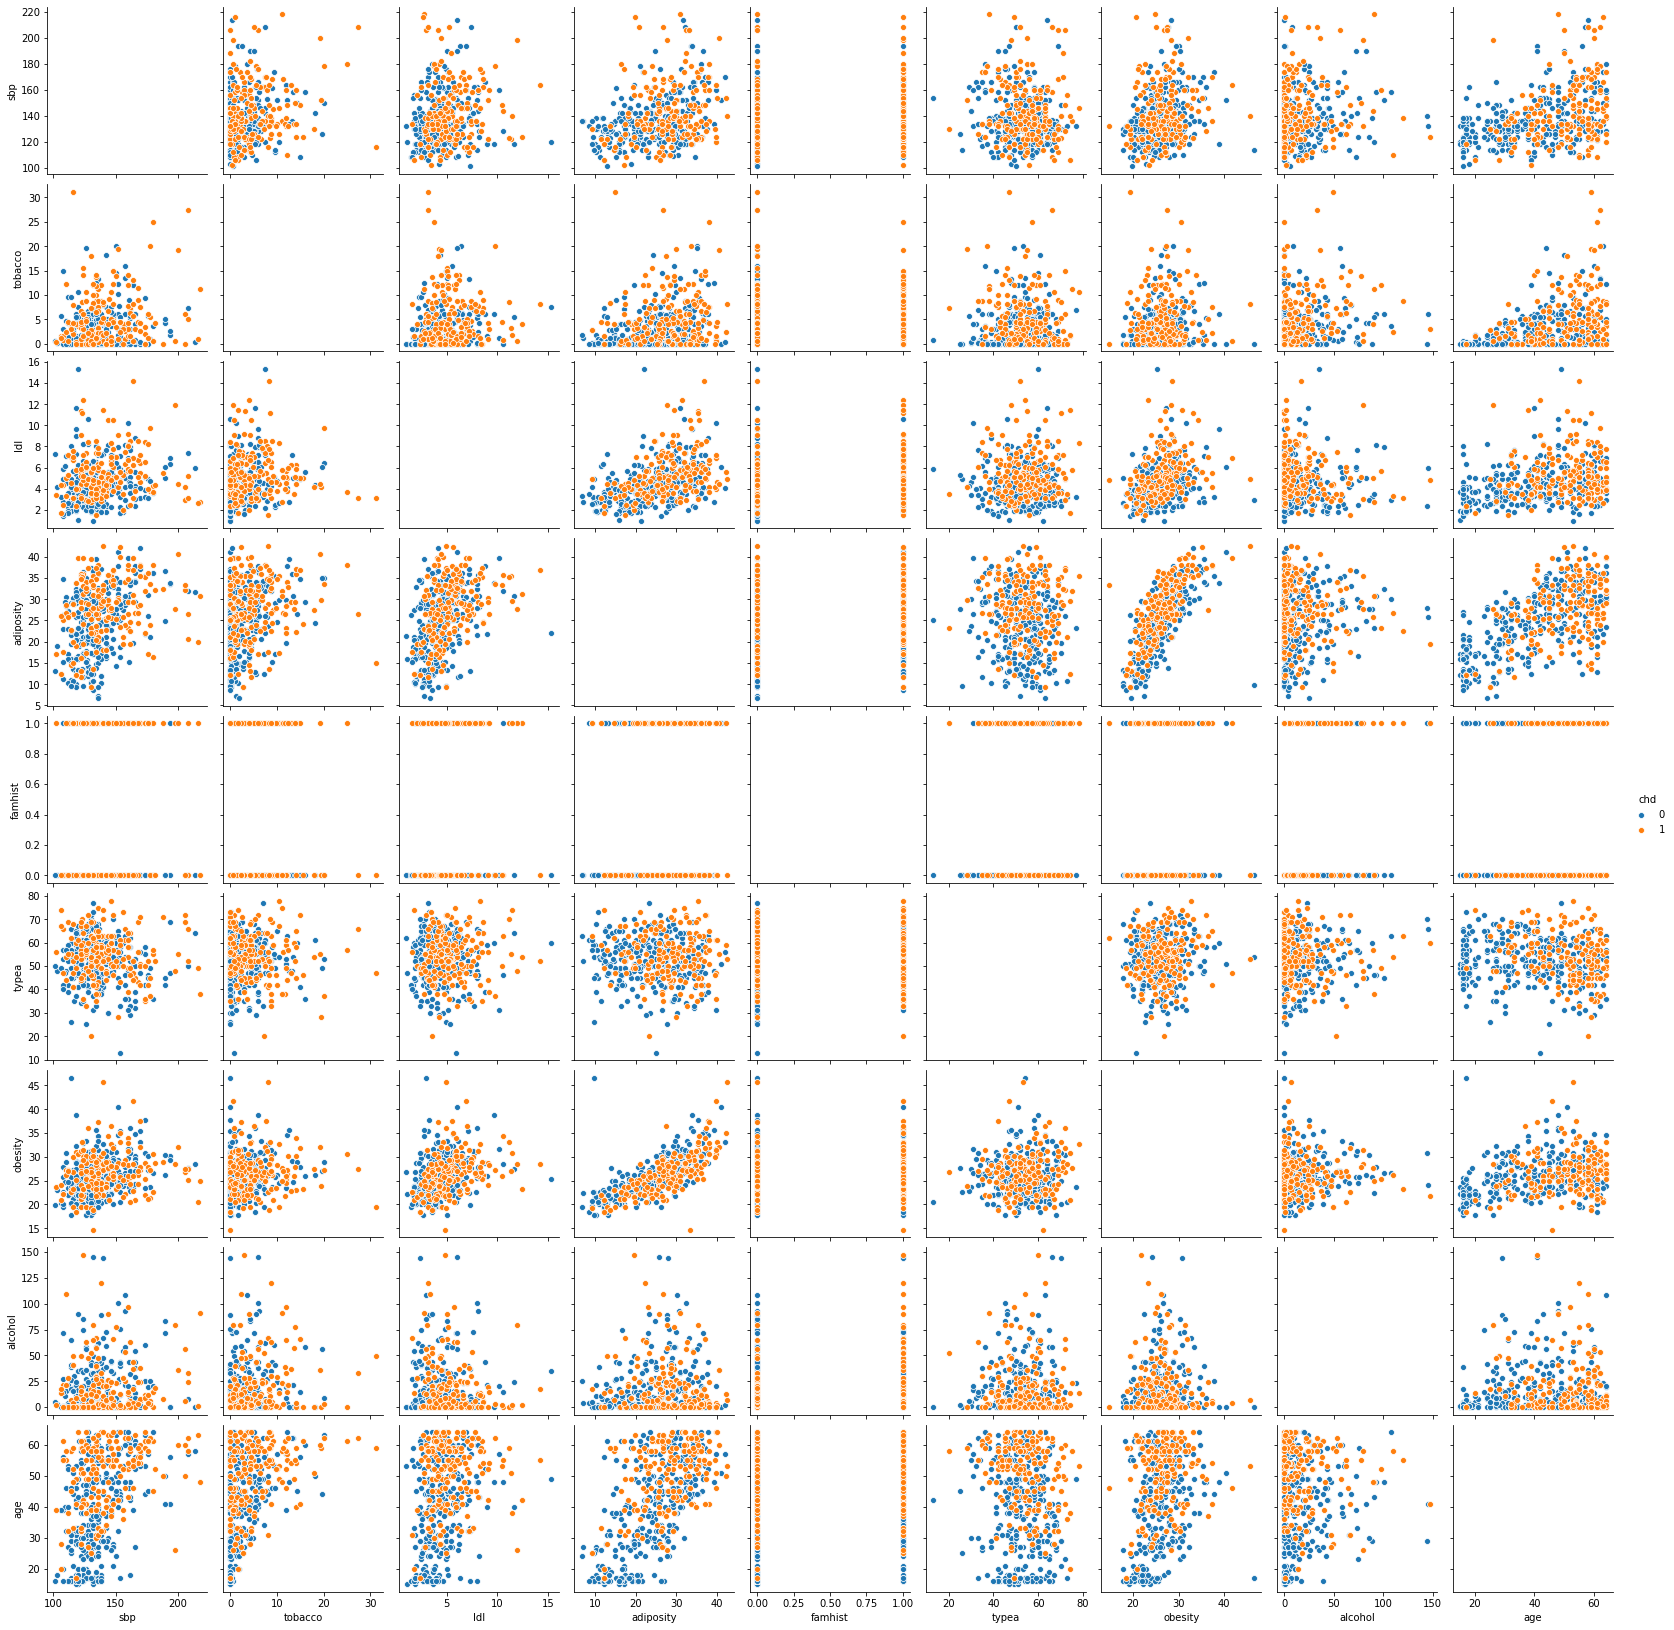

In [ ]:
ds = pd.read_csv( "SAheart.data.txt", ",", index_col=0 )

features=['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

y=ds.iloc[0: ,  -1].values
X=ds.iloc[0: , :-1].values
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.1, random_state=1 )
plotdata = ds.iloc[:,:].values


def changeToBinary(x):
  if x=="Present":
    return 1
  else:
    return 0
baseguess = [0 for i in y_test]
base_score = score( baseguess, y_test )
print(base_score)
ds['famhist'] = ds['famhist'].apply(changeToBinary)

sns.pairplot(data=ds, hue='chd', kind='scatter', diag_kind='None')

# ✅**Unregularized**

In [ ]:
ds = pd.read_csv( "SAheart.data.txt", ",", index_col=0 )
features=['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

y=ds.iloc[0: ,  -1].values
X=ds.iloc[0: , :-1].values

# Turn family history Present/Absent to 1 or 0
X[:,4] = [1 if i=="Present" else 0 for i in X[:,4]]

X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.1, random_state=1 )

X_train=scale(X_train)
X_test=scale(X_test)
X_train = addOneCol(X_train)
X_test = addOneCol(X_test)

# Initialize Thetas
thetas = [ 0 for i in range( len(X_train[0]) ) ]

data=[]

# The question is: Do we go through each theta individually?
# Or for each sample do we adjust every theta?
for j in range( len(thetas) ):
  
  for i in range( len(X_train) ) :
    thetas[j] = updateTheta(thetas, X_train, y_train, i, j, alpha=0.040)
    
    ''' Big running time... but results are good
    if i%4==0:
      data.append( logLike(thetas, X_train, y_train) )
    '''



unreg_score = score( predict(thetas, X_test), y_test )

print(f'our thetas:\n{thetas}')
print(f'Percent correct: {unreg_score}')

# This should be noisily going up and reaching a convergence!
# plt.plot(data)




our thetas:
[-0.6051506841195037, 0.46326554379427093, 0.5079713743319052, 0.3126392828522249, -0.10077743463159351, 0.300114960101021, 0.22659675894004194, -0.3176413119407409, -0.11135629132043134, 0.46734313667851884]
Percent correct: 0.7446808510638298


# ✅**l2 penalty**

In [ ]:
ds = pd.read_csv( "SAheart.data.txt", ",", index_col=0 )
features=['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

y=ds.iloc[0: ,  -1].values
X=ds.iloc[0: , :-1].values

# Turn family history Present/Absent to 1 or 0
X[:,4] = [1 if i=="Present" else 0 for i in X[:,4]]

# 80 10 10 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125,random_state=2)

X_train=scale(X_train)
X_val=scale(X_val)
X_test=scale(X_test)

X_train = addOneCol(X_train)
X_val = addOneCol(X_val)
X_test = addOneCol(X_test)

# Initialize Thetas as 0s
thetas = [ 0 for i in range( len(X_train[0]) ) ]

# First calculate our bias without any penalty

for i in range( len(X_train) ) :    
  thetas[0] = updateThetal2(thetas, X_train, y_train, i, 0, 0.1, alpha=0.010)

bias=thetas[0]

# Find the best lambda for L2 penalty
data=[]
best_lambda=0
best_accuracy=0

for l in np.linspace(0,1,50):

  thetas = [ 0 for i in range( len(X_train[0]) ) ]
  thetas[0]=bias

  # Go update everything with penalty except bias
  for j in range( len(thetas)-1 ):
  
    for i in range( len(X_train) ) :    
      thetas[j+1] = updateThetal2(thetas, X_train, y_train, i, j+1, l, alpha=0.010)
  
  cur_accuracy=score(predict(thetas,X_val), y_val)

  if( cur_accuracy > best_accuracy) :
    best_lambda=l
    best_accuracy = cur_accuracy


thetas = [ 0 for i in range( len(X_train[0]) ) ]
thetas[0]=bias

for j in range( len(thetas)-1 ):
    for i in range( len(X_train) ) :    
      thetas[j+1] = updateThetal2(thetas, X_train, y_train, i, j+1, best_lambda, alpha=0.010)


print(f'our thetas:\n{thetas}')

# Now we will predict and see how well our testing does.
l2_score = score( predict(thetas, X_test), y_test )
correct_val = score( predict(thetas, X_val), y_val)
print(f'Best lambda: {best_lambda}')
print(f'Percent correct: {l2_score}')
print(f'Validation Percent correct: {correct_val}')

# This should be noisily going up and reaching a convergence
# plt.plot(data)




our thetas:
[-0.2564722082319143, 0.1859133850369362, 0.2544015798655998, 0.21687211739839218, 0.12620734358513352, 0.2352907579492077, 0.060774987260548335, -0.04766931390783555, 0.011114137967108183, 0.1796566119767722]
Best lambda: 0.08163265306122448
Percent correct: 0.7446808510638298
Validation Percent correct: 0.7115384615384616


# **✅L1 penalty**

naive method


our thetas:
[-0.06165763862595006, 0.05224468451863533, 0.1444147920795832, 0.08850009977537555, 0.04969552365987197, 0.1340676816497403, 0.040729402535474274, 0.0013471127084415451, 0.003090911184318048, 0.12835960873063257]
Best lambda: 0.08163265306122448
Percent correct: 0.7659574468085106
Validation Percent correct: 0.7692307692307693


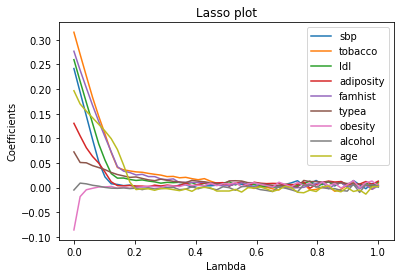

In [ ]:
ds = pd.read_csv( "SAheart.data.txt", ",", index_col=0 )
features=['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

y=ds.iloc[0: ,  -1].values
X=ds.iloc[0: , :-1].values

# Turn family history Present/Absent to 1 or 0
X[:,4] = [1 if i=="Present" else 0 for i in X[:,4]]

# 80 10 10 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125,random_state=2)

X_train=scale(X_train)
X_val=scale(X_val)
X_test=scale(X_test)

X_train = addOneCol(X_train)
X_val = addOneCol(X_val)
X_test = addOneCol(X_test)

# Initialize Thetas as 0s
thetas = [ 0 for i in range( len(X_train[0]) ) ]

# First calculate our bias without any penalty
for j in range( len(thetas) ):
  for i in range( len(X_train) ) :    
    thetas[j] = updateThetal2(thetas, X_train, y_train, i, j, l, alpha=0.010)

bias=thetas[0]

# Find the best lambda for L2 penalty
data=[]
best_lambda=0
best_accuracy=0
sum_of_thetas =0
for l in np.linspace(0,1,50):

  thetas = [ 0 for i in range( len(X_train[0]) ) ]
  thetas[0]=bias
  
  # Go update everything with penalty except bias
  for j in range( len(thetas)-1 ):
    
    for i in range( len(X_train) ) :    
      thetas[j+1] = updateThetal1(thetas, X_train, y_train, i, j+1, l, alpha=0.010)
      sum_of_thetas+=thetas[j+1]
  
  data.append(thetas[1:])
  sum_of_thetas = 0
   
  cur_accuracy=score(predict(thetas,X_val), y_val)

  if( cur_accuracy > best_accuracy) :
    best_lambda=l
    best_accuracy = cur_accuracy


thetas = [ 0 for i in range( len(X_train[0]) ) ]
thetas[0]=bias

for j in range( len(thetas)-1 ):
    for i in range( len(X_train) ) :    
      thetas[j+1] = updateThetal1(thetas, X_train, y_train, i, j+1, best_lambda, alpha=0.010)


print(f'our thetas:\n{thetas}')

# Now we will predict and see how well our testing does.
l1_score = score( predict(thetas, X_test), y_test )
correct_val = score( predict(thetas, X_val), y_val)
print(f'Best lambda: {best_lambda}')
print(f'Percent correct: {l1_score}')
print(f'Validation Percent correct: {correct_val}')

# This should be noisily going up and reaching a convergence
for i in range( len(features) ):
  theta_i_deta=[j[i] for j in data] #Isolates feature i from coeff array
  plt.plot(np.linspace(0,1,50),theta_i_deta, label=features[i])

plt.title("Lasso plot")
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.legend()

# ✅**Step-wise**


our thetas:
[-0.551063651360032, 0, 0.614896528448191, 0.5646652036001417, 0, 0.5550511697013408, 0, 0, 0.0473128941430083, 0]
Percent correct: 0.723404255319149

Feature ldl  was deemed important
Feature adiposity  was deemed important
Feature typea  was deemed important
Feature age  was deemed important




Text(0, 0.5, 'Accuracy Score (validation)')

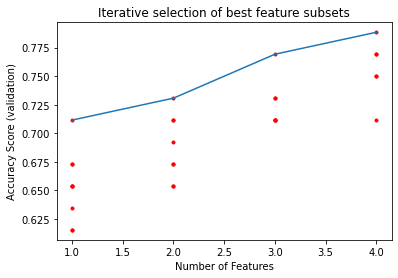

In [ ]:
ds = pd.read_csv( "SAheart.data.txt", ",", index_col=0 )
features=['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

y=ds.iloc[0: ,  -1].values
X=ds.iloc[0: , :-1].values

# Turn family history Present/Absent to 1 or 0
X[:,4] = [1 if i=="Present" else 0 for i in X[:,4]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125,random_state=2)

X_train=scale(X_train)
X_test=scale(X_test)
X_val=scale(X_val)

X_train = addOneCol(X_train)
X_val=addOneCol(X_val)
X_test = addOneCol(X_test)

# Initialize Thetas
thetas = [ 0 for i in range( len(X_train[0]) ) ]

# Get the bias
for i in range( len(X_train) ) :
  thetas[0] = updateTheta(thetas, X_train, y_train, i, 0, alpha=0.040)

bias=thetas[0]

best_features=[bias, 0,0,0,0,0,0,0,0,0] # Initialize it as [bias, 0, 0, ... ,0]
features_remaining=[1,2,3,4,5,6,7,8,9]
feature_count=4

x_data=[]
y_data=[]
x_best=[]
y_best=[]

for f in range( feature_count ):
  best_score=0
  best_j=0
  best_j_theta=0

  for j in features_remaining:
    # Set standard score
    thetas=[i for i in best_features]
    score_with_feature=0
    
    #Train a feature
    for i in range( len(X_train) ) :
      thetas[j] = updateTheta(thetas, X_train, y_train, i, j, alpha=0.040)
    
    # See how much it improved our scoring.
    # Keep track of the best.
    score_with_feature = score( predict(thetas, X_val), y_val)
    x_data.append(f+1)
    y_data.append(score_with_feature)
    if ( score_with_feature > best_score ):
      best_score = score_with_feature
      best_j = j
      best_j_theta = thetas[j]
    
  best_features[best_j] = best_j_theta
  features_remaining.remove(best_j)
  x_best.append(f+1)
  y_best.append(best_score)

thetas=best_features

step_score = score( predict(thetas, X_test), y_test )

print(f'our thetas:\n{thetas}')
print(f'Percent correct: {step_score}\n')
# This should be noisily going up and reaching a convergence

for i in range( len(thetas)-1 ): # This range to ignore bias
  if (thetas[i+1] != 0):
    print(f'Feature {features[i+1]}  was deemed important')

print("\n")
plt.figure()
plt.plot(x_data, y_data, 'r.')
plt.plot(x_best,y_best)

plt.title("Iterative selection of best feature subsets")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score (validation)")




# **✅Comparison of Methods**



In [ ]:
Headers = ("base score", "unreg score", "step score", "l2 score", "l1 score")
scores = [(base_score, unreg_score, step_score, l2_score, l1_score)]
t = Table(rows=scores, names=Headers)
t = t.to_pandas()
t

,base score,unreg score,step score,l2 score,l1 score
0,0.659574,0.744681,0.723404,0.744681,0.765957


**All the results are better than the baseline score**

Although, adding penalty terms does not bring significant increase in the accuracy score when attempted with multiple random shuffles.



Notes
---
**Four most important features selected by L1:**
______________________________________
1.   Age
2.   Tobacco
3.   Famhist
4.   Ldl 
**Note:** These correlate with what the textbook in figure 4.13 Show as being the most important variables.




**Four most important features selected by Stepwise:**
______________________________________
1.  Age
2.  Adiposty
3.  Ldl
4.  Type a

**Note:** Only half of stepwise's selection match the ones selected by L1



# ✅**Office Occupation Data**

https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Office conditions and whether it was occupied or not

Labels:
---
1.   Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

Attribute Information:
---
Data take in the month of february.
2.   Temperature, in Celsius
3.   Relative Humidity, %
4.   Light, in Lux
5.   CO2, in ppm
6.   Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air










Base score: 0.6595744680851063


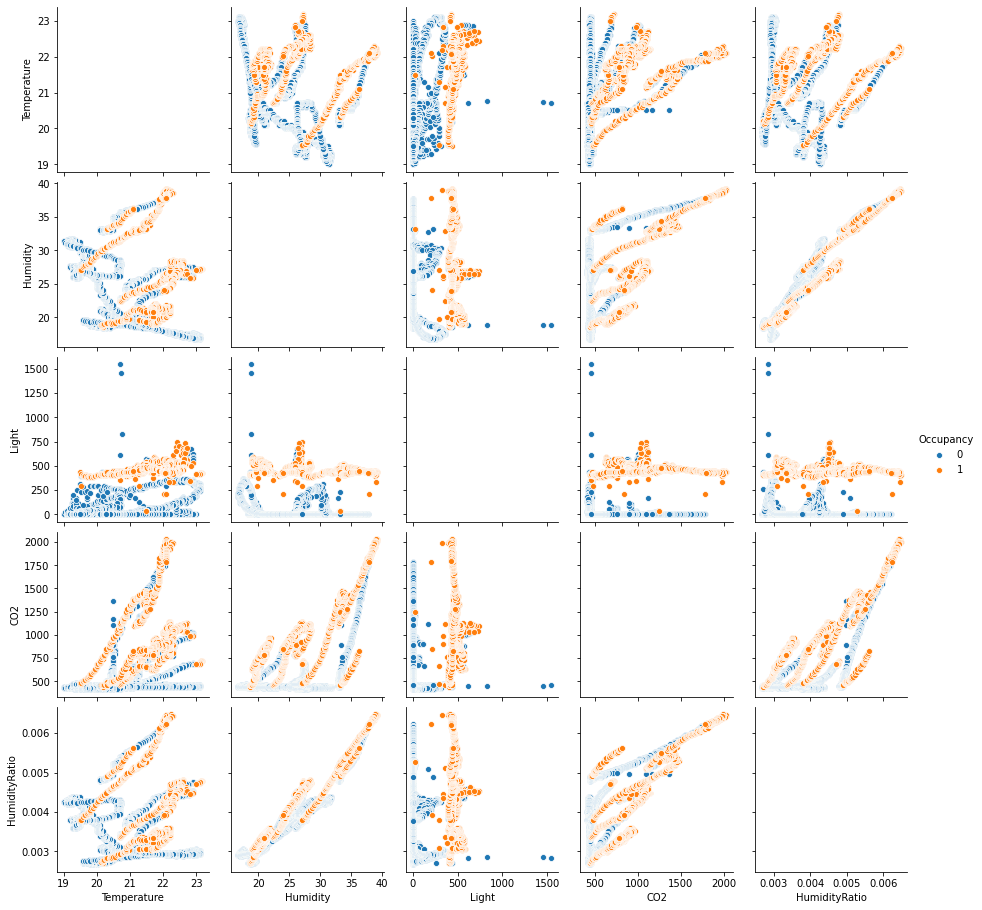

In [ ]:
## SCATTERPLOT AND BASELINE
ds = pd.read_csv( "occupation.txt", ",", index_col=0)
features=['Temperature', 'Relative Humidity', 'Light', 'CO2', 'Humidity']

y=ds.iloc[0: ,  -1].values
X=ds.iloc[0: , 1:-1].values
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.1, random_state=1 )
plotdata = ds.iloc[:,:].values


baseguess = [0 for i in y_test]
results_base = score( baseguess, y_test )
print(f'Base score: {base_score}')


sns.pairplot(data=ds, hue='Occupancy', kind='scatter', diag_kind='None')

In [ ]:
ds = pd.read_csv( "occupation.txt", ",", index_col=0)
features=['Temperature', 'Relative Humidity', 'Light', 'CO2', 'Humidity']

y=ds.iloc[0: ,  -1].values
X=ds.iloc[0: , 1:-1].values

X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.3, random_state=3 )

X_train=scale(X_train)
X_test=scale(X_test)
X_train = addOneCol(X_train)
X_test = addOneCol(X_test)

# Initialize Thetas
thetas = [ 0 for i in range( len(X_train[0]) ) ]
data=[]
for j in range( len(thetas) ):
  
  for i in range( len(X_train) ) :
    thetas[j] = updateTheta(thetas, X_train, y_train, i, j, alpha=0.1)
    '''
    if i%4==0:
      data.append( logLike(thetas, X_train, y_train) )
    '''


prediction = predict(thetas, X_test)
results_unregularized = score( prediction, y_test )

print(f'our thetas:\n{thetas}')
print(f'Percent correct: {results_unregularized}')

Headers = ("base score", "unreg score")
scores = [(results_base, results_unregularized)]
t = Table(rows=scores, names=Headers)
t = t.to_pandas()
t
# This should be noisily going up and reaching a convergence!
# plt.plot(data)




our thetas:
[-1.0430092856154969, 1.6758763885443804, 0.5828711128058689, 2.1989799998505157, 0.4033320979727353, 0.07619106621251608]
Percent correct: 0.918952108063856


,base score,unreg score
0,0.781595,0.918952


Comments
---

The most important features:
---
**Temperature** - The data was taken in february, so heating systems would be on at their prime when people are in their office

**Light** - The lights would clearly be correlated with people being in the offices

**CO2** - It would make sense for a positive correlation with CO2 and human presence


# **✅Functions for multinomial**

In [ ]:

#----------------MULTI CLASS CLASSIFICATION----------------------#
# i   observation #
# j   feature #
# k   classes [0,0,0]

# This is the sigmoid of our multiclass problem
# You put in a class and it tells you what percent match it is
# You then pick the argmax ( class % ), TRIVIAL!

species = {
  "Iris-setosa"       : 0,   #[1,0,0]
  "Iris-versicolor"  : 1,   #[0,1,0]
  "Iris-virginica"    : 2,   #[0,0,1]
}


def softMax(thetas, sample, k):
  top = np.exp( np.matmul(np.transpose(thetas[k]), sample) )
  bottom = 0;

  for i in range(3):
    bottom = bottom + np.exp( np.matmul( np.transpose(thetas[i]), sample) )

  return ( top / bottom )

def bestClass( thetas, sample ):
  best_class = 7
  best_prob  = 0
  
  for k in [0,1,2]:
    temp = softMax(thetas,sample,k)  
    if ( temp > best_prob):
      best_prob = temp
      best_class = k
  
  return best_class

def getSpeciesProbability(labels):
  dist=[0,0,0]
  for i in labels:
    k=species[i]
    dist[k]+=1

  return np.divide( dist, len(labels) )


def entropyGradient(thetas, samples, labels, cur_class):
  n = len(samples)

  summation=0
  for i in range(n):
    k           =  species[labels[i]]
    target      =  [0,0,0]
    target[k]   =  1

    pred = softMax(thetas, samples[i], cur_class)
    # pred        =  [softMax(thetas,samples[i], k) for k in [0,1,2]] 
    # max_prob_class_index =  pred.index(max(pred))
    # max_pred    =  max(pred) 
    to_compare_to = target[cur_class]
    summation += np.multiply( samples[i] , (to_compare_to - pred) )

  # return (1/n)*summation
  return summation


# Ascend 
# Should be looping through classes
def updateClassTheta(thetas, samples, labels, a=0.1):
  
  for k in [0,1,2]:
      thetas[k] = thetas[k] + a*( entropyGradient(thetas, samples, labels, k) )

  return thetas

def accuracyScore(guess, actual):
  length = len(actual)
  score = 0
  
  for i in range( length ):
    if guess[i]==actual[i]:
      score+=1      

  return score/length


# **✅Multiclass classification problem**

Feature Information:
---
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Classes/Labels:
---
0. Iris Setosa
1. Iris Versicolour
2. Iris Virginica



In [ ]:
ds = pd.read_csv( "iris.data.txt", ",")
features=['sepla length', 'speal width', 'petal length', 'petal width']

y=ds.iloc[ : ,  -1].values
X=ds.iloc[ : , :-1].values

X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.3, random_state=1 )

X_train=scale(X_train)
X_test=scale(X_test)

bias_X_train  = np.ones(( len(X_train), len(X_train[0])+1 ))
bias_X_test   = np.ones(( len(X_test),  len(X_test[0])+1  ))

bias_X_train[ :, 1: ] = X_train
bias_X_test[ :, 1: ]  = X_test

thetas = [ 0 for i in range( len(bias_X_train[0]) ) ]
thetas = [thetas, thetas, thetas]

for j in range(20):
  for i in range(1):
    updateClassTheta(thetas, bias_X_train, y_train, a=0.1)
  guesses=[]
  actual_species = []

  for i in range( len(bias_X_test) ):
    pred = bestClass(thetas,bias_X_test[i])
    percent = softMax(thetas, bias_X_test[i], pred)
    actual = species[y_test[i]]

    guesses.append(pred)
    actual_species.append(actual)
    #print(f'{pred} | {actual} | {percent}')

  score = accuracyScore(guesses, actual_species)
  print(f'pass {j+1} : {score}')

print("\n\nBaseline: 0.333333333333333")
print(f'Score: {score}')
#print( entropyGradient(thetas, bias_X_train, y_train, target) )



pass 1 : 0.8888888888888888
pass 2 : 0.9111111111111111
pass 3 : 0.9111111111111111
pass 4 : 0.9333333333333333
pass 5 : 0.9555555555555556
pass 6 : 0.9555555555555556
pass 7 : 0.9777777777777777
pass 8 : 0.9777777777777777
pass 9 : 0.9555555555555556
pass 10 : 0.9555555555555556
pass 11 : 0.9555555555555556
pass 12 : 0.9555555555555556
pass 13 : 0.9555555555555556
pass 14 : 0.9555555555555556
pass 15 : 0.9555555555555556
pass 16 : 0.9555555555555556
pass 17 : 0.9555555555555556
pass 18 : 0.9555555555555556
pass 19 : 0.9555555555555556
pass 20 : 0.9555555555555556


Baseline: 0.333333333333333
Score: 0.9555555555555556


Comments
---
The results of the training model and a 70 30 split are very consistently above 90% correct. This is expected for the iris dataset, as the features should be very distinct for each label(species).